# Import Data and Packages

In [1]:
import pandas as pd
df = pd.read_csv('../../Data/Crop_Recommendation_with_clusters.csv', index_col=0)

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib import style

# Split into Train and Test Sets

In [3]:
X = df.drop('Crop_Cluster', axis=1)
y = df['Crop_Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Normalize the Input Data

In [4]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    index=X_train.index,
    columns=X_train.columns
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    index=X_test.index,
    columns=X_test.columns
)


# Perform Grid Search on Parameters C and fit_intercept

In [5]:
grid = [{'C': [1e1,1e2,1e3,1e4,1e5,1e6],
        'fit_intercept': [True, False]}]
gridsearch = GridSearchCV(estimator = LogisticRegression(solver='liblinear'),
            param_grid=grid,
            scoring='accuracy',
            cv=4)
gridsearch.fit(X_train_scaled, y_train)


GridSearchCV(cv=4, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [10.0, 100.0, 1000.0, 10000.0, 100000.0,
                                1000000.0],
                          'fit_intercept': [True, False]}],
             scoring='accuracy')

In [6]:
gridsearch.cv_results_ #Preview Results

{'mean_fit_time': array([0.01033419, 0.00274831, 0.00766307, 0.00799584, 0.00884068,
        0.00593227, 0.00799006, 0.00822407, 0.00743484, 0.00377059,
        0.01197666, 0.00728548]),
 'std_fit_time': array([0.00777937, 0.0027709 , 0.00701973, 0.00468607, 0.00777946,
        0.00074522, 0.00947936, 0.00570004, 0.00750489, 0.00281493,
        0.00698317, 0.00559571]),
 'mean_score_time': array([0.0082106 , 0.00059503, 0.00049931, 0.00023228, 0.00077438,
        0.00074977, 0.00032669, 0.00039053, 0.00475806, 0.00049639,
        0.00074941, 0.00074488]),
 'std_score_time': array([0.01364849, 0.00060959, 0.00049931, 0.00040232, 0.00044893,
        0.00043288, 0.00037822, 0.00067642, 0.00653784, 0.00049639,
        0.00043269, 0.00082154]),
 'param_C': masked_array(data=[10.0, 10.0, 100.0, 100.0, 1000.0, 1000.0, 10000.0,
                    10000.0, 100000.0, 100000.0, 1000000.0, 1000000.0],
              mask=[False, False, False, False, False, False, False, False,
                    

In [7]:
gridsearch.best_estimator_ # See the best estimator

LogisticRegression(C=10000.0, solver='liblinear')

In [8]:
gridsearch.best_score_ # get the score for the best estimator

0.9880681818181819

In [9]:
gridsearch.best_params_ # Get the best params

{'C': 10000.0, 'fit_intercept': True}

# Visualize Grid Search

In [10]:
mean_test_scores = gridsearch.cv_results_['mean_test_score']
params = gridsearch.cv_results_['params']
mean_scores_fit = []
mean_scores_nofit = []
Cs_fit = []
Cs_nofit = []
# Create Arrays for mean_test_scores and C-value
for i in range(len(mean_test_scores)):
    if params[i]['fit_intercept'] == False:
        mean_scores_nofit.append(mean_test_scores[i])
        Cs_nofit.append(params[i]['C'])
    else:
        mean_scores_fit.append(mean_test_scores[i])
        Cs_fit.append(params[i]['C'])

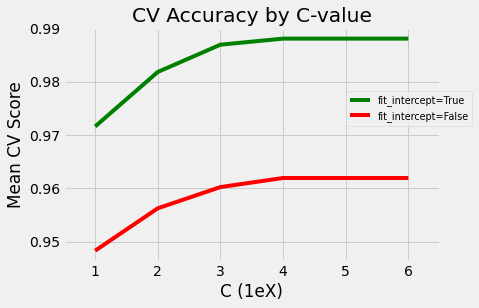

In [45]:
style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5,6], mean_scores_fit, label='fit_intercept=True', color='g') # plot mean scores with fit_intercept=True
ax.plot([1,2,3,4,5,6], mean_scores_nofit, label='fit_intercept=False', color='r') # plot mean scores with fit_intercept=False (X values are log(C))

ax.set_xlabel("C (1eX)")
ax.set_ylabel("Mean CV Score")
ax.set_title("CV Accuracy by C-value")
ax.set_xlim(.5,6.5)
ax.legend(bbox_to_anchor=(1.1,.75), fontsize='x-small')

# Train best model

In [13]:
final_logReg = LogisticRegression(solver = 'liblinear', C=1e4, fit_intercept=True)
final_logReg.fit(X_train_scaled, y_train)

LogisticRegression(C=10000.0, solver='liblinear')

# Evaluate on Train and Test Data

In [14]:
final_logReg.score(X_train_scaled, y_train)

0.990909090909091

In [15]:
final_logReg.score(X_test_scaled, y_test)

0.9795454545454545

# Plot Confusion Matrices for Train and Test Data

C:\Users\dclutterbuck\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


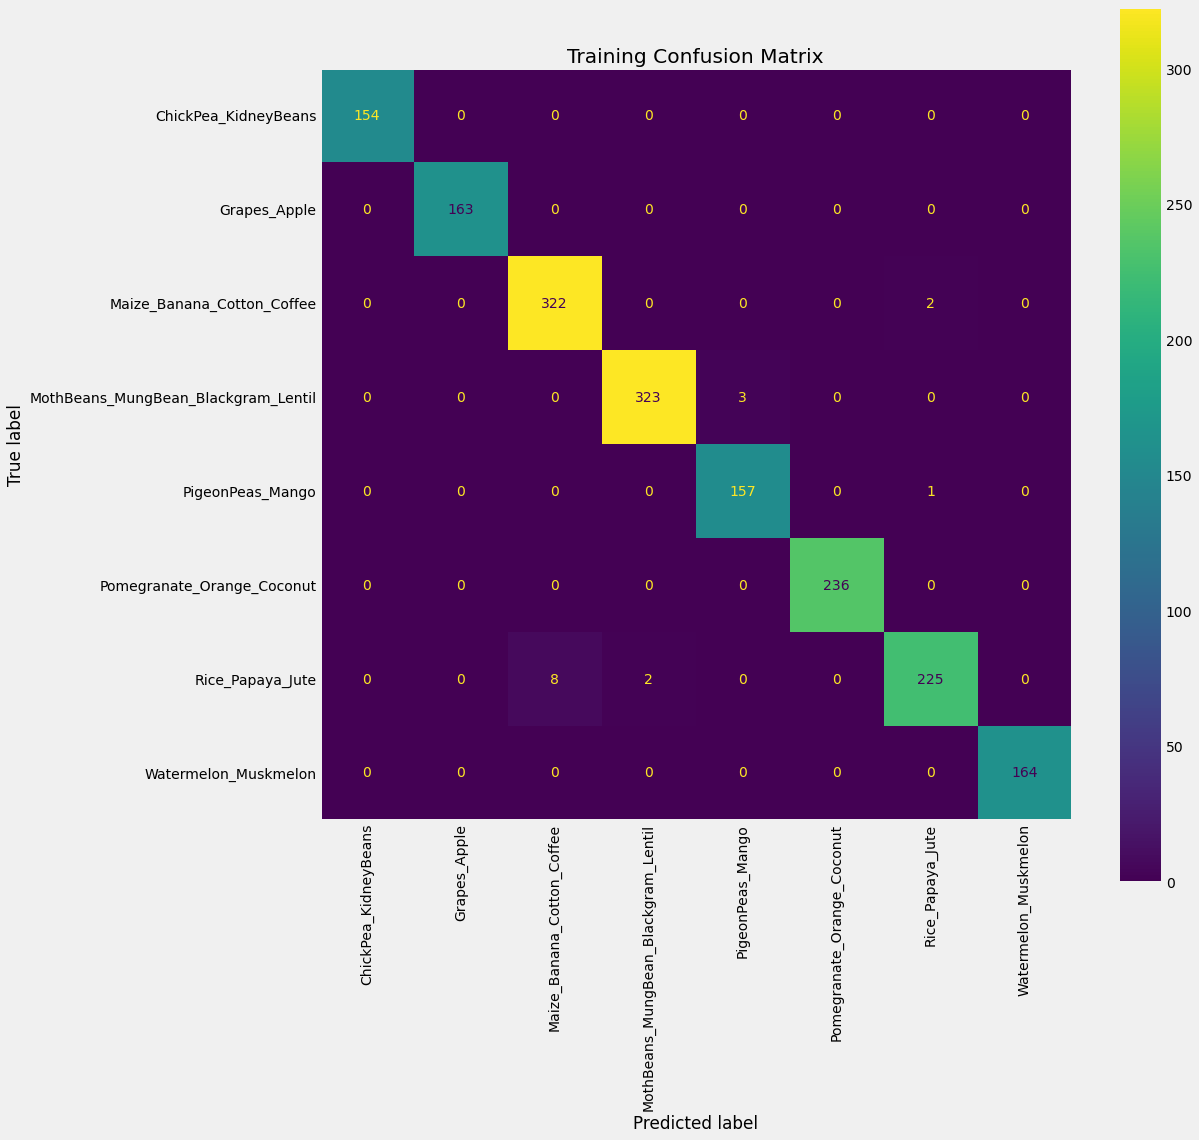

In [18]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(estimator=final_logReg,
                     X=X_train_scaled,
                     y_true=y_train,
                     ax = ax,
                     xticks_rotation='vertical')
plt.title("Training Confusion Matrix")
plt.grid(False)

C:\Users\dclutterbuck\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


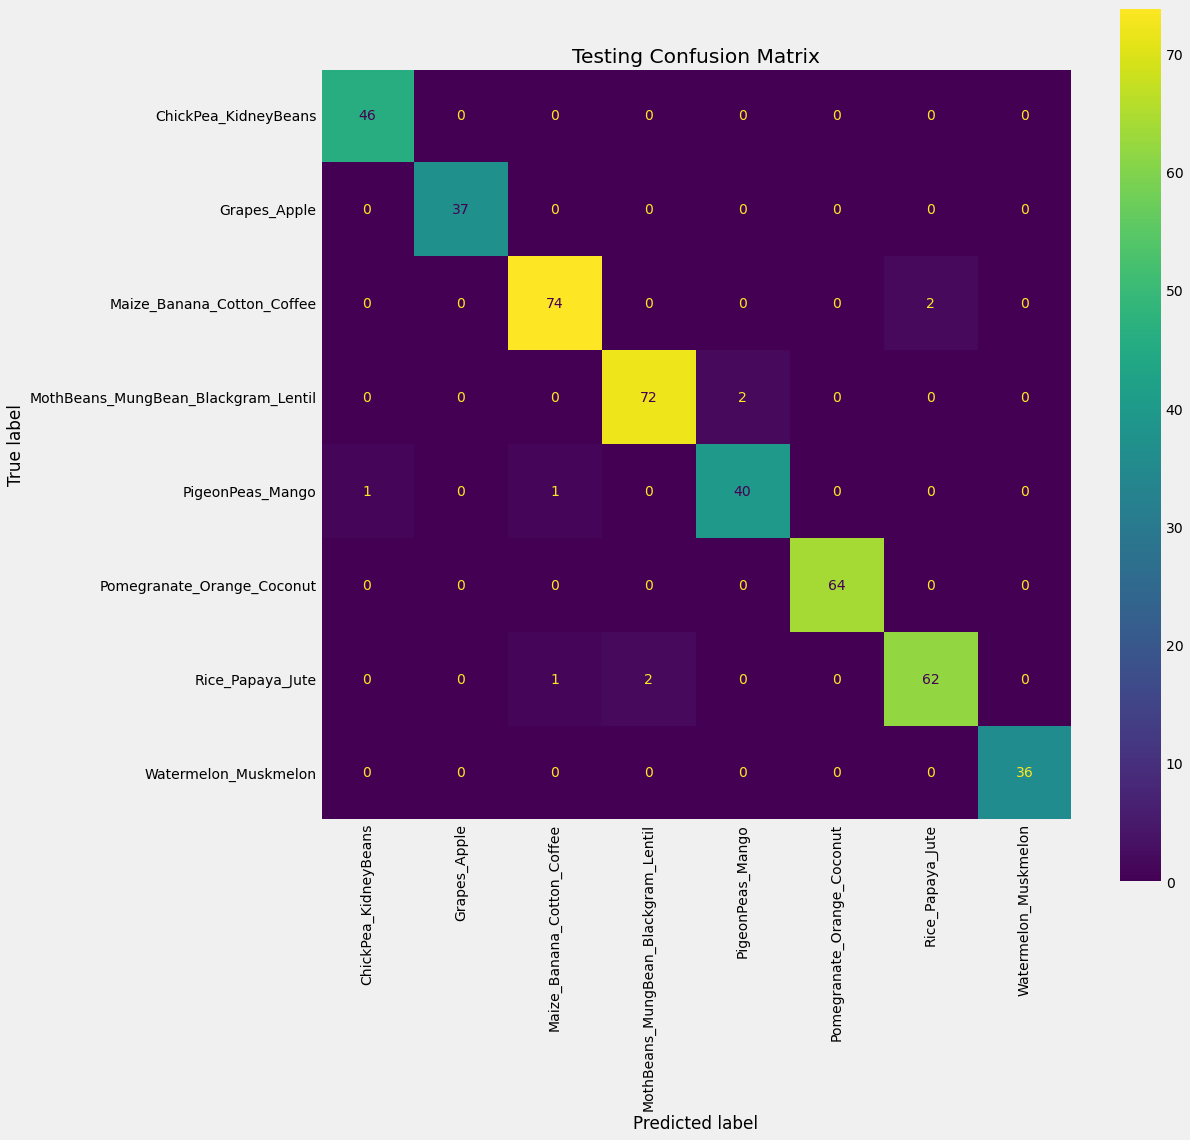

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(estimator=final_logReg,
                     X=X_test_scaled,
                     y_true=y_test,
                     ax = ax,
                     xticks_rotation='vertical')
plt.title("Testing Confusion Matrix")
plt.grid(False)